# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [535]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)

#this is our REAL DATA
y_t = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [537]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45

# create dataset
dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

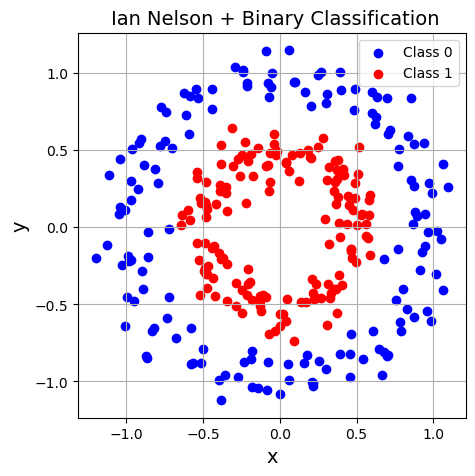

In [539]:
import matplotlib.pyplot as plt

# Plot each class
# Your code plot with scatter
#The figure size should be set to 5×5.
plt.figure(figsize=(5, 5))

#Data points with y = 0 should be marked in blue, 
# and those with y = 1 should be marked in red
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')

#Both the x-axis and y-axis labels should have a font size of 14.
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
# Add Label and title
plt.title(" Ian Nelson + Binary Classification", fontsize=14)

# Your code set graph axises
plt.grid()
plt.legend()
plt.show()


In [540]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [543]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [545]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    """Simple training wrapper for PyTorch network."""
    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            #sigmoid function
            m = nn.Sigmoid() # pytorch docs suggest applying sigmoid here
            # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
            # Forward pass to get output
            y_hat = model(X)
            # Calculate loss (flattening everything to ensure array's  lign up
            loss = criterion(m(y_hat).flatten(), y.flatten()) # loss was angry about BCELoss's values being "ambiguous"
            # Getting gradients w.r.t. parameters
            loss.backward() 
            # Update parameters
            optimizer.step()    
            # Add loss for this batch to running total
            losses += loss.item()       
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [547]:
LEARNING_RATE = 0.1

# loss function - binary cross entropy loss
criterion = torch.nn.BCELoss(None, True, True, 'mean') #default fields from pytorch docs

# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1)

# optimization algorithm - Adam
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

Let's train the model:

In [549]:
# Your code
trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)


epoch: 1, loss: 0.7065
epoch: 2, loss: 0.6861
epoch: 3, loss: 0.6752
epoch: 4, loss: 0.6533
epoch: 5, loss: 0.6238
epoch: 6, loss: 0.5897
epoch: 7, loss: 0.5661
epoch: 8, loss: 0.5463
epoch: 9, loss: 0.5346
epoch: 10, loss: 0.5239
epoch: 11, loss: 0.5195
epoch: 12, loss: 0.5193
epoch: 13, loss: 0.5131
epoch: 14, loss: 0.5102
epoch: 15, loss: 0.5139
epoch: 16, loss: 0.5089
epoch: 17, loss: 0.5099
epoch: 18, loss: 0.5082
epoch: 19, loss: 0.5129
epoch: 20, loss: 0.5095
epoch: 21, loss: 0.5103
epoch: 22, loss: 0.5084
epoch: 23, loss: 0.5015
epoch: 24, loss: 0.5097
epoch: 25, loss: 0.5124
epoch: 26, loss: 0.5057
epoch: 27, loss: 0.5096
epoch: 28, loss: 0.5068
epoch: 29, loss: 0.5060
epoch: 30, loss: 0.5077


#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [551]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss(None, True, True, 'mean') # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [552]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    resultArr = []
    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            #sigmoid function
            m = nn.Sigmoid() # pytorch docs suggest applying sigmoid here
            # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
            # Forward pass to get output
            y_hat = model(X)
            # Calculate loss (flattening everything to ensure array's  lign up
            loss = criterion(m(y_hat).flatten(), y.flatten()) # loss was angry about BCELoss's values being "ambiguous"
            # Getting gradients w.r.t. parameters
            loss.backward() 
            # Update parameters
            optimizer.step()    
            # Add loss for this batch to running total
            losses += loss.item()
            # compile outputs
            resultArr.append(loss.item())
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return resultArr


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

epoch: 1, loss: 0.5037
epoch: 2, loss: 0.5033
epoch: 3, loss: 0.5046
epoch: 4, loss: 0.5056
epoch: 5, loss: 0.5048
epoch: 6, loss: 0.5048
epoch: 7, loss: 0.5069
epoch: 8, loss: 0.5105
epoch: 9, loss: 0.5067
epoch: 10, loss: 0.5048
epoch: 11, loss: 0.5071
epoch: 12, loss: 0.5037
epoch: 13, loss: 0.5028
epoch: 14, loss: 0.5051
epoch: 15, loss: 0.5010
epoch: 16, loss: 0.5035
epoch: 17, loss: 0.5017
epoch: 18, loss: 0.5048
epoch: 19, loss: 0.5052
epoch: 20, loss: 0.5048
epoch: 21, loss: 0.5032
epoch: 22, loss: 0.5022
epoch: 23, loss: 0.5062
epoch: 24, loss: 0.5021
epoch: 25, loss: 0.5045
epoch: 26, loss: 0.5025
epoch: 27, loss: 0.5034
epoch: 28, loss: 0.5036
epoch: 29, loss: 0.5060
epoch: 30, loss: 0.5015


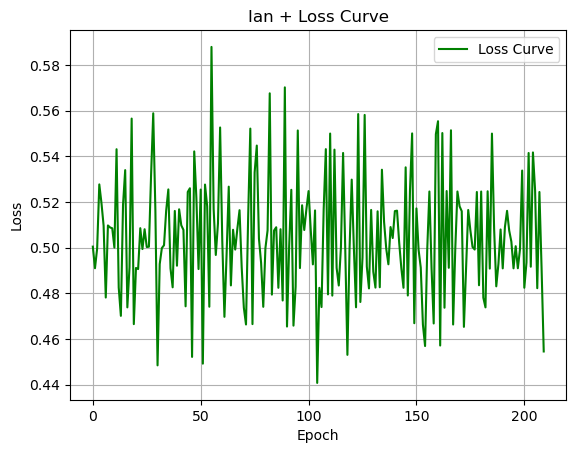

In [567]:
# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code

# Your code 
plt.plot(trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True), label='Loss Curve', color='green')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Ian + Loss Curve")
plt.grid()
plt.legend()
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

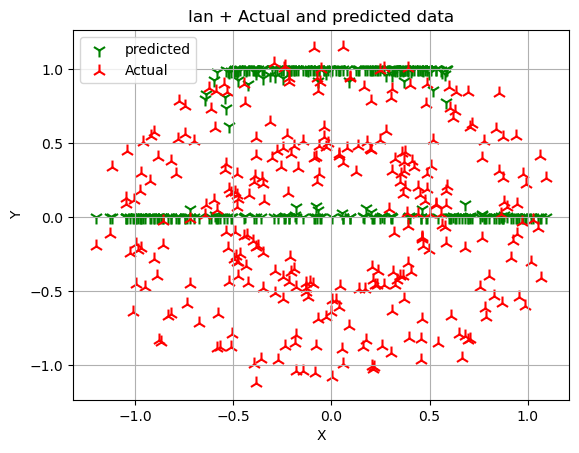

In [526]:
# I WANNA TALK TO ZHU ABOUT THIS ONE

import matplotlib.pyplot as plt
# Your code
#I'm trying to use a scatterplot, 
# Your code
x_coords = X_t[:, 0]
y_coords = X_t[:, 1]
with torch.no_grad():
    y_pred = model(X_t)  # Get predicted values
# Your code y_t
plt.scatter(x_coords, y_pred, s=100, color='green', label='predicted', alpha=1, marker="1")
plt.scatter(x_coords, y_coords, s=100, label='Actual', alpha=1, color='red', marker="2")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ian + Actual and predicted data")
plt.grid()
plt.legend()
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [465]:
# this part feels a bit off

# use predicted y values, throw them into sigmoid
prediction = y_pred
print(prediction)

tensor([[9.9096e-01],
        [9.9899e-01],
        [9.8556e-01],
        [9.9982e-01],
        [2.9201e-06],
        [8.7608e-01],
        [1.0610e-03],
        [9.9202e-01],
        [9.9923e-01],
        [9.9984e-01],
        [8.3951e-05],
        [9.7746e-01],
        [9.9862e-01],
        [1.9795e-02],
        [2.9524e-03],
        [1.5196e-03],
        [6.1869e-02],
        [9.9535e-01],
        [1.2402e-02],
        [6.5215e-03],
        [7.8102e-01],
        [9.3367e-01],
        [9.8930e-05],
        [9.9947e-01],
        [9.8298e-01],
        [9.7394e-01],
        [9.6397e-01],
        [9.9758e-01],
        [9.9994e-01],
        [1.3483e-04],
        [9.7848e-01],
        [9.4548e-03],
        [9.9441e-01],
        [1.3298e-04],
        [8.1572e-01],
        [9.8967e-01],
        [2.3539e-05],
        [2.9236e-04],
        [2.6022e-02],
        [9.8856e-01],
        [9.9742e-01],
        [9.9976e-01],
        [1.0428e-02],
        [9.0178e-01],
        [5.1980e-05],
        [3

In [466]:
#sigmoid to be thrown into
probability = torch.sigmoid(prediction)
print(probability)

tensor([[0.7293],
        [0.7309],
        [0.7282],
        [0.7310],
        [0.5000],
        [0.7060],
        [0.5003],
        [0.7295],
        [0.7309],
        [0.7310],
        [0.5000],
        [0.7266],
        [0.7308],
        [0.5049],
        [0.5007],
        [0.5004],
        [0.5155],
        [0.7301],
        [0.5031],
        [0.5016],
        [0.6859],
        [0.7178],
        [0.5000],
        [0.7310],
        [0.7277],
        [0.7259],
        [0.7239],
        [0.7306],
        [0.7310],
        [0.5000],
        [0.7268],
        [0.5024],
        [0.7300],
        [0.5000],
        [0.6933],
        [0.7290],
        [0.5000],
        [0.5001],
        [0.5065],
        [0.7288],
        [0.7306],
        [0.7310],
        [0.5026],
        [0.7113],
        [0.5000],
        [0.5008],
        [0.5000],
        [0.7307],
        [0.5000],
        [0.5009],
        [0.5000],
        [0.5007],
        [0.5004],
        [0.7274],
        [0.5226],
        [0

In [467]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [470]:
#make new data

X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset =TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=42, shuffle=True)

In [471]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

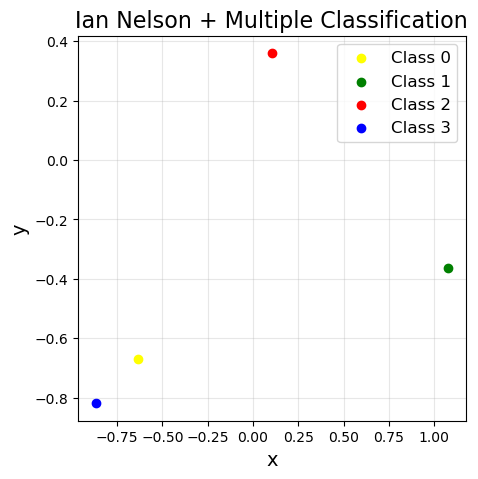

In [473]:
# ASK ZHU FOR HELP ON THIS TOO
# I FEEL LIKE IM SUPPOSED TO HAVE MORE POINTS ON THE GRAPH

# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
# Add Label and title
plt.title("Ian Nelson + Multiple Classification", fontsize=16)
# Your code 
plt.scatter(X[0, 0], X[0, 1], color='yellow', label='Class 0')
plt.scatter(X[1, 0], X[1, 1], color='green', label='Class 1')
plt.scatter(X[2, 0], X[2, 1], color='red', label='Class 2')
plt.scatter(X[3, 0], X[3, 1], color='blue', label='Class 3')


plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

Let's train this model:

In [475]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(2, 6, 4)

# Your code 
# loss function with CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss()
# optimization algorithm - Adam lr=0.2
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2)

accuracy_history = []

for epoch in range(10):
    losses = 0
    correct = 0
    total = 0
    for X_batch, y_batch in dataloader:
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # Forward pass to get output
        y_hat = model_2(X_batch)
        # Calculate loss
        loss = criterion(y_hat, y_batch)
        # Getting gradients w.r.t. parameters
        loss.backward()
        # Update parameters
        optimizer.step()
        # Add loss for this batch to running total
        losses += loss.item()

        #figure out accuracy
        predicted = torch.max(y_hat, 1)
        correct += (predicted == y_batch).sum().item()
        
        total += y_batch.size(0)

    accuracy = correct / total
    accuracy_history.append(accuracy)
    
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

AttributeError: 'bool' object has no attribute 'sum'

#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [ ]:
# Your code

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [ ]:
# Your code